<a href="https://colab.research.google.com/github/EddyGiusepe/Confusion_Matrix_to_ML_DL/blob/main/Example_Metrics_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Calculando as Métricas de Modelos de Machine Learning em Python</h2>


Data Scientist: Dr.Eddy Giusepe Chirinos Isidro

Links de estudo e Dataset:

* [Métricas de validação em Python](https://www.flai.com.br/juscudilio/como-calcular-as-metricas-de-validacao-dos-modelos-de-machine-learning-em-python/)

* [Algoritmo KNN para classificação](https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/)

* [Dataset: Social Network Ads (Anúncios de redes sociais)](https://www.kaggle.com/datasets/rakeshrau/social-network-ads/code)

# KNN para Classificação

O algoritmo KNN (`K Nearest Neighbor`) é um dos algoritmos mais utilizados em Machine Learning e também um dos mais simplistas, analisando seu processo de cálculo. Este algoritmo pode ser aplicado em diversos segmentos de negócio, logo também se aplica em diversos problemas como `finanças`, `saúde`, `ciência política`, `reconhecimento de imagem` e `reconhecimento de vídeos`. O que acho mais fantástico neste algoritmo é a possibilidade de utilização do mesmo tanto para `classificação` quanto para `regressão`. Na classificação a máquina irá dizer a que grupo determinado registro faz parte, dentro obviamente de um contexto de negócio. Já a regressão irá nos fornecer um número/valor, por exemplo o valor de mercado de uma determinada casa que irá ser colocada a venda. Para ambos os casos o algoritmo irá analisar diversas features (Colunas com dados, as quais geraram informação).

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

Ao ajustar um modelo de `Machine Learning` para `classificação` é necessário avaliar sua performance em dados desconhecidos. Existem muitas métricas como `Acurácia`, `Recall`, `Precision`, `F1-Score` e `AUC`, que avaliam seu modelo, antes de colocá-lo em produção.

# Importando as nossas Bibliotecas necessárias

In [1]:
import pandas as pd # manipulação de dataset


from sklearn.preprocessing import LabelEncoder # pré-processamento
from sklearn.preprocessing import MinMaxScaler # padronização
from sklearn.neighbors import KNeighborsClassifier # classificador
from sklearn.model_selection import train_test_split #separando em dados teste e treinamento 
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score # acuracia
from sklearn.metrics import precision_score # precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score # f1-score
from sklearn.metrics import roc_auc_score # area sob curva roc
from sklearn.metrics import roc_curve # curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão

import matplotlib.pyplot as plt  # gráfico
%matplotlib inline


# Importando nosso Dataset a partir do Github

In [2]:
url = 'https://raw.githubusercontent.com/scudilio/classification_metrics/master/dataset_Social_Network_Ads.csv'
data = pd.read_csv(url)
data.sample(6)


,User ID,Gender,Age,EstimatedSalary,Purchased
178,15584114,Male,24,23000,0
219,15732987,Male,59,143000,1
135,15578006,Male,23,63000,0
31,15729054,Female,27,137000,1
33,15776733,Female,28,44000,0
368,15779744,Male,38,71000,0


In [3]:
# Entendendo o dataset, colunas, data types, quantidade de registros por coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# Verificando detalhes estatísticos do dataset
data.describe()   

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
# Valores únicos na coluna: "Purchased"

data['Purchased'].unique()

array([0, 1])

In [6]:
# Quantidade de valores únicos na coluna: "Purchased"
data['Purchased'].nunique()

2

In [9]:
# Reparamos que aqui basicamente são as somas dos números 1. Ou seja das classes "1".
data['Purchased'].sum()

143

In [10]:
data['Purchased'].count()

400

In [12]:
# Podemos perceber que apenas 35.75% dos clientes compraram o anúncio.
data['Purchased'].sum()/data['Purchased'].count()*100

35.75

In [15]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# `X` $⟹$ variável Independente e `y` $⟹$ variável Dependente

In [37]:
# Criando variáveis independentes e dependentes
# Utilizaremos apenas as variáveis numéricas

y = data['Purchased']

X = data.iloc[ :, [2,3]].values # Na seguiente célula podemos comprovar que pegamos a 2da e 3ra coluna

In [38]:
y.shape

(400,)

In [39]:
X.shape

(400, 2)

In [40]:
# Verificando as colunas 2 e 3 
pd.DataFrame(X).head()

,0,1
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


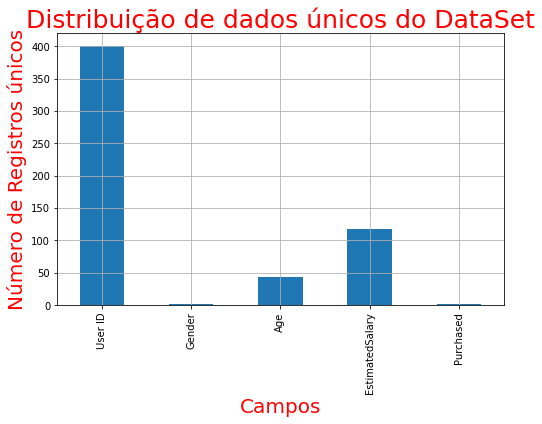

In [36]:
# Verificação de registros nulos no dataset

def distribuicao (data):
    '''
    Esta função exibirá a quantidade de registros únicos para cada coluna
    existente no dataset
    
    dataframe -> Histogram
    '''
    plt.figure(figsize=(8, 5))
    # Calculando valores únicos para cada label: num_unique_labels
    num_unique_labels = data.apply(pd.Series.nunique)

    # Plotando valores
    num_unique_labels.plot( kind='bar')
    
    # Nomeando os eixos
    plt.xlabel('Campos', fontsize=20, c='r')
    plt.ylabel('Número de Registros únicos', fontsize=20, c='r')
    plt.title('Distribuição de dados únicos do DataSet', fontsize=25, c='r')
    plt.grid(True)
    
    # Exibindo gráfico
    plt.show()



distribuicao(data)

# Pré-Processamento: padronizando as variáveis ou também chamado: Feature Scaling

Padronizamos nossa variável X: [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Etapa importante que irá reduzir a escala numérica das colunas (nossas features), para que todas estejam dentro de uma mesma escala de valor, lembrando que na matemática os números são infinitos dentro de suas escalas, podendo serem representados então em diversas escalas diferentes. <font color="orange">Se houverem medidas com escalas de valor muito diferentes a distância calculada pelo algorítimo será influênciada podendo gerar resultados errôneos</font>.

In [47]:
X = MinMaxScaler().fit_transform(X) # assim: [0, 1]

In [48]:
X.min()

0.0

In [49]:
X.max()

1.0

# Separando o Dados em Treino e Teste

In [50]:
x_treino, x_teste, y_treino, y_teste  = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Fitting (ajustando) o KNN nos Dados de Treino

In [51]:
knn = KNeighborsClassifier()

knn.fit(x_treino, y_treino)

KNeighborsClassifier()

<font color="orange">Exemplo:</font>

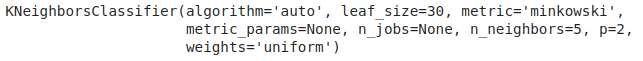

# Calculando a Matriz de Confusão nos Dados de Teste

In [77]:
#Calculando a matriz de confusão
resultado_knn = knn.predict(x_teste) # Fazemos predições!

print(pd.crosstab(y_teste, resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        50   8   58
1         4  38   42
All      54  46  100


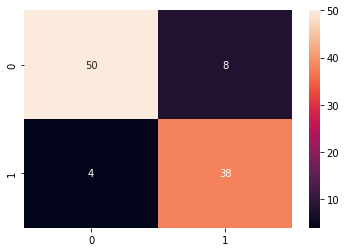

In [78]:
# Também:  Confusion Matrix usando seaborn

import seaborn as sn

cm = confusion_matrix(y_teste, resultado_knn)
sn.heatmap(cm, annot=True)
plt.show()

# Calculando as métricas

## Accuracy (Acurácia)

In [79]:
# Acurácia
acuracia = accuracy_score(y_teste, resultado_knn)
print(f'Acurácia:', acuracia*100,'%')

Acurácia: 88.0 %


## Precision

In [80]:
# Precision
precision = precision_score(y_teste, resultado_knn)
print('Precision: %f' % precision)

Precision: 0.826087


## Recall

In [81]:
# Recall
recall = recall_score(y_teste, resultado_knn)
print('Recall: %f' % recall)

Recall: 0.904762


## f1-score

In [82]:
# F1-Score
f1 = f1_score(y_teste, resultado_knn)
print('f1-score: %f' % f1)

f1-score: 0.863636


## Analisando as métricas de acordo com as classes

In [83]:
print(classification_report(y_teste, resultado_knn))


              precision    recall  f1-score   support

           0       0.93      0.86      0.89        58
           1       0.83      0.90      0.86        42

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



## Área sob a Curva ROC - AUC

In [84]:
# Calculando a àrea sob a curva ROC
auc = roc_auc_score(y_teste, resultado_knn)
print('ROC-AUC: %.3f' % auc)

ROC-AUC: 0.883


## Gráfico da Curva ROC

In [104]:
# Estimando as probabilidades
knn_prob = knn.predict_proba(x_teste)
probs = knn_prob[:, 1]

rfp, rvp, lim = roc_curve(y_teste, probs)

In [105]:
knn_prob[:4] # Só imprimi os 4 primeiros

array([[1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ]])

In [106]:
probs

array([0. , 0. , 0.6, 1. , 0.8, 0.2, 0. , 1. , 0. , 0.8, 0. , 0.2, 0. ,
       0.8, 1. , 1. , 0.8, 0. , 0. , 0.8, 0.2, 1. , 1. , 0.8, 0.8, 0. ,
       0.8, 0.6, 1. , 1. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 1. ,
       0. , 1. , 1. , 0.4, 0. , 1. , 0.4, 1. , 1. , 0.2, 0.8, 0. , 0. ,
       0. , 1. , 0. , 0. , 0.8, 0. , 0.8, 1. , 0. , 0. , 0.8, 0. , 0.8,
       1. , 0. , 0. , 1. , 0. , 1. , 0. , 0.8, 0.2, 0. , 1. , 0. , 0. ,
       0. , 0. , 0. , 0.8, 1. , 0. , 0. , 0. , 1. , 0. , 0.8, 0. , 1. ,
       0.8, 1. , 0. , 0. , 0.8, 1. , 0.2, 0. , 0. ])

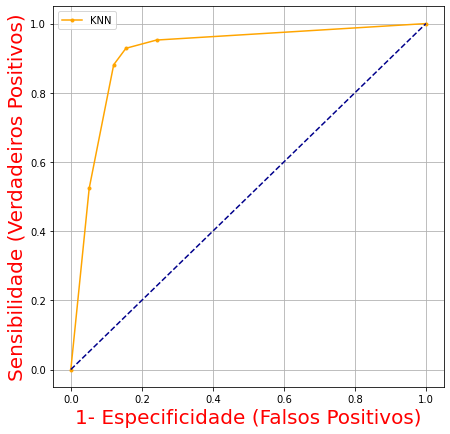

AUC-ROC : 0.883415435139573


In [107]:
plt.figure(figsize=(7, 7))
# Gráfico da curva ROC
plt.plot(rfp, rvp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# axis labels
plt.xlabel('1- Especificidade (Falsos Positivos)', fontsize=20, c='r')
plt.ylabel('Sensibilidade (Verdadeiros Positivos)', fontsize=20, c='r')
# show the legend
plt.legend()
plt.grid(True)
# show the plot
plt.show()

print("AUC-ROC :",auc)